In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import metrics as mr

In [17]:
game=pd.read_csv('games.csv')

In [18]:
game.head()

,gameId,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,3326086514,1949,9,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,3229566029,1851,9,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,3327363504,1493,9,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,3326856598,1758,9,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,3330080762,2094,9,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0


In [19]:
game.columns

Index(['gameId', 'gameDuration', 'seasonId', 'winner', 'firstBlood',
       'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon',
       'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills',
       't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills'],
      dtype='object')

## Distribution of Game Duration

In [25]:
time= game['gameDuration']/60 # Transform seconds into minutes

(array([6.13707977e-03, 7.18988424e-05, 4.10850528e-04, 7.45693709e-03,
        1.94126875e-02, 3.69046487e-02, 4.93688266e-02, 5.14487574e-02,
        4.03866069e-02, 2.73421027e-02, 1.42308352e-02, 6.37845445e-03,
        3.08651459e-03, 1.14524585e-03, 4.15986160e-04, 1.33526422e-04,
        6.16275792e-05, 3.08137896e-05, 0.00000000e+00, 1.02712632e-05]),
 array([ 3.16666667,  6.94833333, 10.73      , 14.51166667, 18.29333333,
        22.075     , 25.85666667, 29.63833333, 33.42      , 37.20166667,
        40.98333333, 44.765     , 48.54666667, 52.32833333, 56.11      ,
        59.89166667, 63.67333333, 67.455     , 71.23666667, 75.01833333,
        78.8       ]),
 <BarContainer object of 20 artists>)

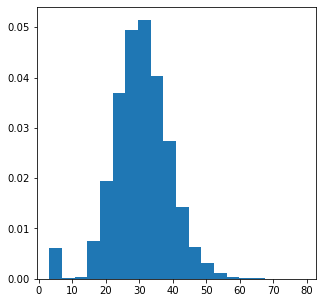

In [29]:
plt.figure(figsize=(5,5))
plt.hist(time,density=True,bins=20)

In [30]:
re_time=time[time>15]

(array([8.72930923e-03, 1.82147004e-02, 3.29051843e-02, 4.61397418e-02,
        5.40254886e-02, 5.06887305e-02, 4.03160366e-02, 2.82874609e-02,
        1.68150116e-02, 8.99799949e-03, 4.24905532e-03, 2.50569291e-03,
        9.81031889e-04, 4.12408310e-04, 1.56215269e-04, 6.24861076e-05,
        4.99888861e-05, 1.24972215e-05, 0.00000000e+00, 1.24972215e-05]),
 array([15.01666667, 18.20583333, 21.395     , 24.58416667, 27.77333333,
        30.9625    , 34.15166667, 37.34083333, 40.53      , 43.71916667,
        46.90833333, 50.0975    , 53.28666667, 56.47583333, 59.665     ,
        62.85416667, 66.04333333, 69.2325    , 72.42166667, 75.61083333,
        78.8       ]),
 <BarContainer object of 20 artists>)

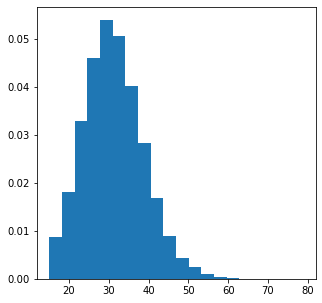

In [32]:
plt.figure(figsize=(5,5))
plt.hist(re_time,density=True,bins=20)

nearly a normal distribution.

## Probability of conditional winning

In [8]:
first_stage=game.iloc[:,4:10]

In [9]:
def calc_prob(f):
    data=first_stage[first_stage[f]!=0]
    n=len(data)
    same=first_stage[first_stage['winner']==first_stage[f]]
    prob=len(same)/n
    return prob

In [10]:
calc_prob('firstBlood')

0.5910866791008148

In [11]:
calc_prob('firstTower')

0.708216480696939

In [12]:
calc_prob('firstInhibitor')

0.9110231344273897

In [13]:
calc_prob('firstBaron')

0.8067686987704918

In [14]:
calc_prob('firstDragon')

0.6803192564154374

## Histogram of towerKills/inhibitorKills/baronKills/dragonKills/riftHeraldKills

In [31]:
winner_t1=game[game['winner']==1]
winner_t1=winner_t1[['t1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills']]
winner_t1.columns=['TowerKills','InhibitorKills','BaronKills','DragonKills','RiftHeraldKills']
winner_t2=game[game['winner']==2]
winner_t2=winner_t2[['t2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills']]
winner_t2.columns=['TowerKills','InhibitorKills','BaronKills','DragonKills','RiftHeraldKills']

winner=pd.concat([winner_t1,winner_t2])
winner.head()

,TowerKills,InhibitorKills,BaronKills,DragonKills,RiftHeraldKills
0,11,1,2,3,0
1,10,4,0,2,1
2,8,1,1,1,0
3,9,2,1,2,0
4,9,2,1,3,0


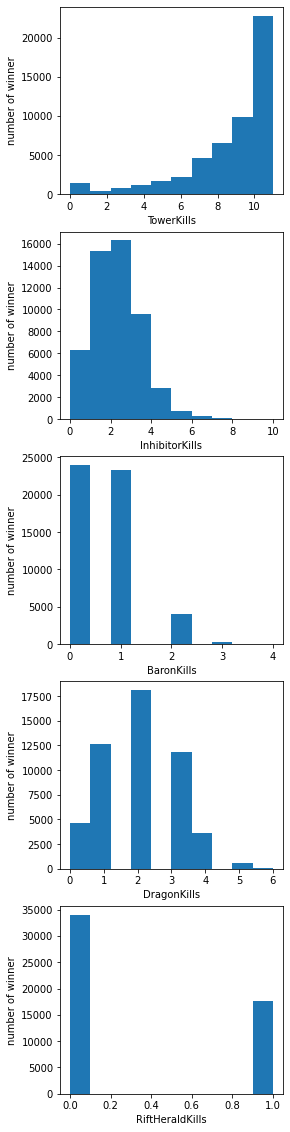

In [32]:
plt.figure(figsize=(4,20))
for i in range(5):
    plt.subplot(511+i)
    plt.hist(winner.iloc[:,i])
    plt.xlabel(winner.columns[i])
    plt.ylabel('number of winner')

# Model
Comparing Navie bayes / AODE /TAN tree

In [42]:
# Split train data and test data
train = game[0:int(0.9*len(game))]
test = game[int(0.9*len(game)):int(len(game))]

y_train = train['winner']
X_train = train.iloc[:,4:10]

y_test = test['winner']
X_test = test.iloc[:,4:10]

In [43]:
train.head()

,gameId,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,3326086514,1949,9,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,3229566029,1851,9,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,3327363504,1493,9,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,3326856598,1758,9,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,3330080762,2094,9,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0


In [221]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=2.0)
clf.fit(X_train,y_train)

# test accurancy
clf.predict(X_test)
sum(clf.predict(X_test)==y_test)/len(y_test)

0.6766362400466109

In [219]:
# Average one dependent estimate
%run AODE.ipynb
Bs = Aode()
Bs.AodeTrain(X_train, y_train,[0,0,0,0,0,0])
Proba = Bs.aodepredict(X_test)
logProba = Bs.aodepredictLog(X_test)
yPredict = np.argmax(logProba, axis=1)+1 #because prediction is 0,1 and our label is 1,2
print(f"错误{sum(yPredict!=y_test)}个，准确率为：{sum(yPredict==y_test)/y_test.size}")

P(y,pa)训练完毕!
P(x|y,pa)训练完毕!
错误533个，准确率为：0.8964847543212274


In [ ]:
# TAN tree
#regular_state = False
dataset = train.iloc[:,3:10]
label_names = 'winner'
features_info
target
#TANTree = TANMatrix(features_info)

target = dict()
for i in list(dataset.columns[1:]):
    target[i] = dataset[i][0]

features_info = dict()
for i in list(dataset.columns[1:]):
    features_info[i] = 'dispersed'


In [220]:
%run TAN.ipynb
TANTree = TANMatrix(features_info)
dataset_nums = dataset.shape[0]

TANObject = TAN(dataset, features_info, label_names,offset=0.5)

condition_dataset = TANObject.getConditionData(dataset)

TANTree = calculateConditionalMutualInfo(condition_dataset, list(dataset.columns[1:]), TANTree)

TANTree.MaxSpanTree_prim()

#####

for children, parent in TANTree.spanningTree.items():
    print('====================')
    print(parent, '===', TANTree._TANMatrix[parent][children], '===>', children)
    print('====================')

# TANObject.setParentInfo((parent, target[parent]))
# TANObject.getPriorProb(dataset_nums, regular=regular_state)
# TANObject.getEvidenceProb(dataset_nums)

# #subDataset = TANObject.getConditionData(dataset,)

# for iclass, subdata in condition_dataset.items():
#     TANObject.getClassConditionalProb(subdata, target, iclass, regular=regular_state)

# predict_class = TANObject.getPredictClass(target)
# print('predict label is :', predict_class)
# print('==============prior prob===================')
# print(TANObject.prior_prob)
# print('==============ClassConditionalProb===================')
# print(TANObject.class_conditional_prob)

# nb = NativeBayesModel(dataset, features_info, label_names)


# nb.getPriorProb(dataset_nums, regular=regular_state)

# nb.getEvidenceProb(dataset_nums)

# subDataset = nb.getConditionData(dataset)
# for iclass, subdata in subDataset.items():
#     nb.getClassConditionalProb(subdata, target, iclass, regular=regular_state)

# predict_class = nb.getPredictClass(target)
# print('predict label is :', predict_class)
# print('==============prior prob===================')
# print(nb.prior_prob)
# print('==============ClassConditionalProb===================')
# print(nb.class_conditional_prob)

firstBaron === 0 ===> firstBaron
firstTower === 0.11108136536802231 ===> firstBlood
firstTower === 0.2068702320086629 ===> firstDragon
firstBaron === 0.2240500315403075 ===> firstInhibitor
firstTower === 0.08458244937986042 ===> firstRiftHerald
firstInhibitor === 0.14587854752328416 ===> firstTower
